In [1]:
%load_ext watermark
%watermark -d -a "Sebastian Raschka" -p numpy,matplotlib,pillow,wordcloud,pandas

Author: Sebastian Raschka

numpy     : 1.22.1
matplotlib: 3.5.2
pillow    : not installed
wordcloud : not installed
pandas    : 1.4.2



# Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('back-to-school-responses.csv')

df.head()

,Timestamp,"Your favorite machine learning technique, algorithm, or tool (1 or 2 words)"
0,9/3/2022 9:33:13,random forest
1,9/3/2022 9:42:56,CLIP
2,9/3/2022 9:42:57,Logistic Regression
3,9/3/2022 9:42:58,LDA
4,9/3/2022 9:43:37,Random Forest


In [3]:
df = df.rename(columns={'Your favorite machine learning technique, algorithm, or tool (1 or 2 words)': 'response'})
df.columns

Index(['Timestamp', 'response'], dtype='object')

In [4]:
responses = []

for string in df['response'].values:
    for substring in string.split(','):
        responses.append(substring.strip().lower())

responses[:10]

['random forest',
 'clip',
 'logistic regression',
 'lda',
 'random forest',
 'deep learning',
 'xgboost',
 'scikit-learn',
 'backprop',
 'ann']

## Word cloud

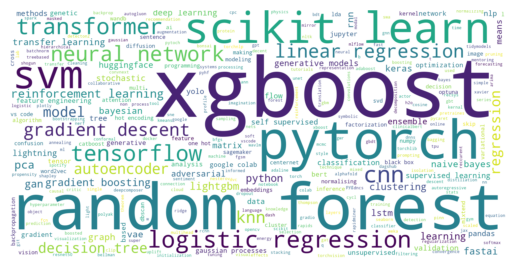

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


# code based on
# https://github.com/amueller/word_cloud/blob/master/examples/masked.py

wc = WordCloud(background_color="white", max_words=2000, width=2000, height=1000,
               contour_width=3, contour_color='steelblue', random_state=1)

# generate word cloud
wc.generate(",".join(responses))

# store to file
wc.to_file("wordcloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()